In [1]:
# Raw Package
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

In [3]:
# import datay
data = yf.download(tickers='ETH-USD', period = '8d', interval='90m')

[*********************100%***********************]  1 of 1 completed


In [4]:
# create moving avg fields
data['MA5'] = data['Close'].rolling(5).mean()
data['MA20'] = data['Close'].rolling(20).mean()

In [6]:
# check for fields
data

,Open,High,Low,Close,Adj Close,Volume,MA5,MA20
Datetime,,,,,,,,
2021-12-14 00:00:00+00:00,3783.259766,3832.939453,3773.495361,3800.404297,3800.404297,800798720,NaN,NaN
2021-12-14 01:30:00+00:00,3797.043945,3797.043945,3758.251465,3781.933594,3781.933594,208218112,NaN,NaN
2021-12-14 03:00:00+00:00,3781.615479,3799.339844,3766.856689,3783.404053,3783.404053,397215744,NaN,NaN
2021-12-14 04:30:00+00:00,3784.136719,3795.172363,3738.198730,3738.198730,3738.198730,305889280,NaN,NaN
2021-12-14 06:00:00+00:00,3739.364746,3757.729248,3700.104736,3742.072510,3742.072510,649052160,3769.202637,NaN
...,...,...,...,...,...,...,...,...
2021-12-20 16:30:00+00:00,3819.263916,3854.180908,3814.195312,3829.018066,3829.018066,540385280,3816.921045,3880.004712
2021-12-20 18:00:00+00:00,3824.424805,3876.814453,3816.488281,3867.864258,3867.864258,568815616,3828.866309,3876.025720
2021-12-20 19:30:00+00:00,3866.442139,3905.217285,3856.496582,3902.485596,3902.485596,343803904,3849.457080,3873.967993


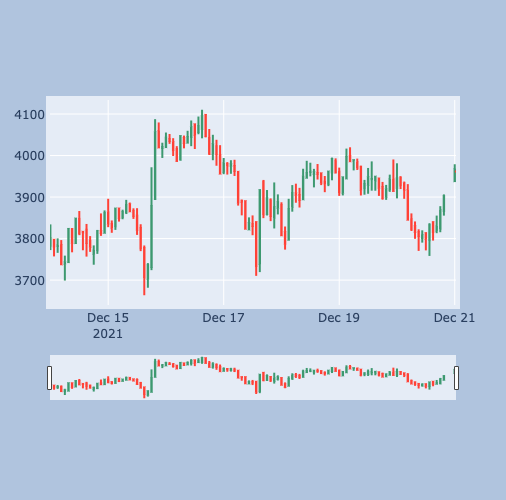

In [27]:
# chart 
fig =go.Figure()

#candlesticks
fig.add_trace(go.Candlestick(x=data.index,
             open=data['Open'],
             high=data['High'],
             low=data['Low'],
             close=data['Close'], name='market data'))

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)

#show
fig.show()

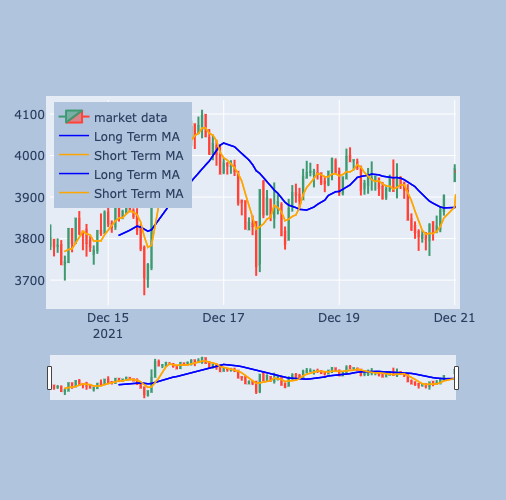

In [32]:
#add moving avgs to chart
fig.add_trace(go.Scatter(x=data.index, y=data['MA20'], line=dict(color='blue', width=1.5), name = 'Long Term MA'))
fig.add_trace(go.Scatter(x=data.index, y=data['MA5'], line=dict(color='orange', width=1.5), name = 'Short Term MA'))

# move legend
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01),
    paper_bgcolor="LightSteelBlue",
)

In [34]:
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=3, label="3d", step="days", stepmode="backward"),
            dict(count=5, label="5d", step="days", stepmode="backward"),
            dict(count=7, label="WTD", step="days", stepmode="todate"),
            dict(step="all")
        ])
    )
)

fig.show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'step' property of layout.xaxis.rangeselector.button
        Received value: 'days'

    The 'step' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['month', 'year', 'day', 'hour', 'minute', 'second',
            'all']